In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(f"dimension of diabetes data: {diabetes.shape}")

dimension of diabetes data: (768, 9)


In [7]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [8]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

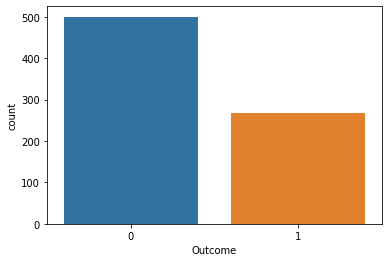

In [9]:
sns.countplot(diabetes['Outcome'],label="Count")

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# #Check the statistical inferacne of the dataset
# diabetes.describe()

In [12]:
# diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose',
#   'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
# diabetes.isnull().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
# #Now we replace the missing value
# diabetes['Glucose'] = diabetes['Glucose'].fillna(diabetes['Glucose'].mean())
# diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean())
# diabetes['SkinThickness'] = diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median())
# diabetes['Insulin'] = diabetes['Insulin'].fillna(diabetes['Insulin'].median())
# diabetes['BMI'] = diabetes['BMI'].fillna(diabetes['BMI'].median())

In [13]:
diabetes_features = diabetes.columns[:-1]

In [14]:
x = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 66)

# K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

In [17]:
# try n_neighbors from 1 to 21 to good selection num neighbors
neighbors_settings = range(1, 21)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))

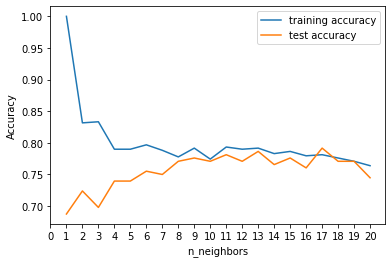

In [18]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(np.arange(0,21,1))
plt.legend()
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [20]:
# Predicting the Test set results
y_pred_m1 = knn.predict(x_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_m1)
print(cm)

[[105  20]
 [ 23  44]]


<AxesSubplot:>

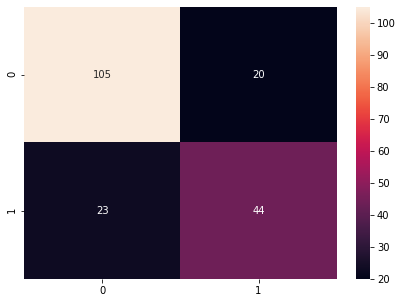

In [22]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt="d")

In [23]:
print(f'Accuracy of K-NN classifier on training set: {knn.score(x_train, y_train):.3f}')
print(f'Accuracy of K-NN classifier on test set: {knn.score(x_test, y_test):.3f}')

Accuracy of K-NN classifier on training set: 0.792
Accuracy of K-NN classifier on test set: 0.776


In [24]:
com_m1 = np.concatenate((y_pred_m1.reshape(len(y_pred_m1),1), y_test.reshape(len(y_test),1)),1)

In [22]:
com_m1[:5,:]

array([[1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [23]:
print(f"{knn.n_samples_fit_}")
print(f"{knn.effective_metric_}")
print(f"{knn.classes_}")

576
euclidean
[0 1]


# Decision Tree Classifier


In [24]:
import sklearn.tree as sklearn_tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
# Predicting the Test set results
y_pred_m2 = tree.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred_m2)
print(cm2)

[[92 33]
 [22 45]]


<AxesSubplot:>

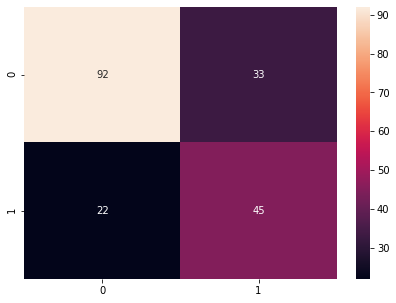

In [27]:
plt.figure(figsize = (7,5))
sns.heatmap(cm2, annot=True, fmt="d")

In [28]:
print(f"Accuracy on training set: {tree.score(x_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(x_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [29]:
com_m2 = np.concatenate((y_pred_m2.reshape(len(y_pred_m2),1), y_test.reshape(len(y_test),1)),1)

In [30]:
com_m2[:5]

array([[1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [31]:
print(f"Feature importances:\n{tree.feature_importances_}")

Feature importances:
[0.05477652 0.28215943 0.08796796 0.05542765 0.07278587 0.20684233
 0.12670183 0.1133384 ]


In [32]:
print(f"{tree.classes_}")
print(f"{tree.n_classes_}")
print("\n")
print(f"{tree.n_features_}")
print(f"{tree.max_features_}")
print(f"{tree.feature_importances_}")
print("\n")
print(f"{tree.n_outputs_}")
print("\n")

# print(f"{tree.tree_.__dir__()}")
# print(f"{tree.tree_.__doc__}")


[0 1]
2


8
8
[0.05477652 0.28215943 0.08796796 0.05542765 0.07278587 0.20684233
 0.12670183 0.1133384 ]


1




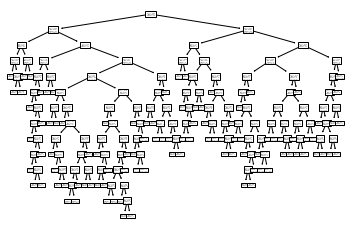

In [33]:
sklearn_tree.plot_tree(tree)
plt.show()

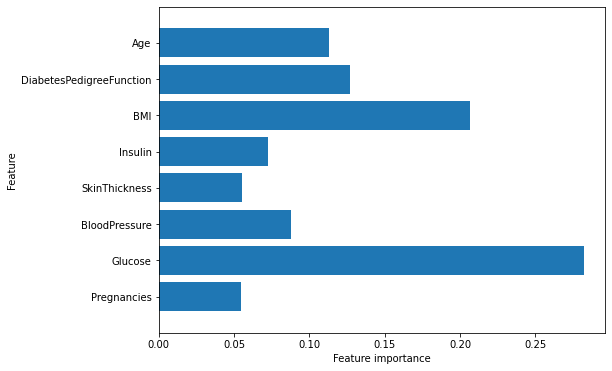

In [34]:
def plot_feature_importances_diabetes(model):

    plt.figure(figsize=(8,6))

    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.ylim(-1, n_features)
    
plot_feature_importances_diabetes(tree)

# Decision Tree Classifier With max depth


In [35]:
tree2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
# Predicting the Test set results
y_pred_m3 = tree2.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred_m3)
print(cm3)

[[100  25]
 [ 25  42]]


<AxesSubplot:>

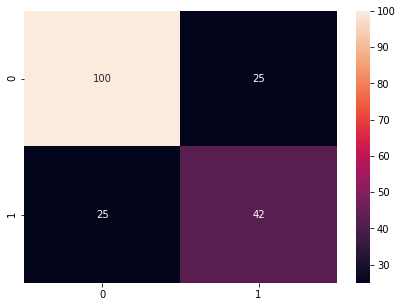

In [37]:
plt.figure(figsize = (7,5))
sns.heatmap(cm3, annot=True, fmt="d")

In [38]:
print(f"Accuracy on training set: {tree2.score(x_train, y_train):.3f}")
print(f"Accuracy on test set: {tree2.score(x_test, y_test):.3f}")

Accuracy on training set: 0.773
Accuracy on test set: 0.740


In [39]:
com_m3 = np.concatenate((y_pred_m3.reshape(len(y_pred_m3),1), y_test.reshape(len(y_test),1)),1)

In [40]:
com_m3[:5]

array([[1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [41]:
print(f"Feature importances:\n{tree2.feature_importances_}")

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


In [42]:
print(f"{tree2.classes_}")
print(f"{tree2.n_classes_}")
print("\n")
print(f"{tree2.n_features_}")
print(f"{tree2.max_features_}")
print(f"{tree2.feature_importances_}")
print("\n")
print(f"{tree2.n_outputs_}")
print("\n")

[0 1]
2


8
8
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


1




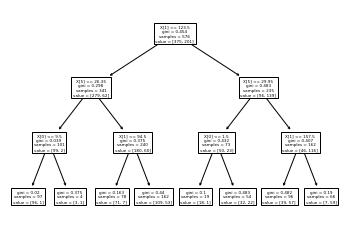

In [43]:
sklearn_tree.plot_tree(tree2)
plt.show()

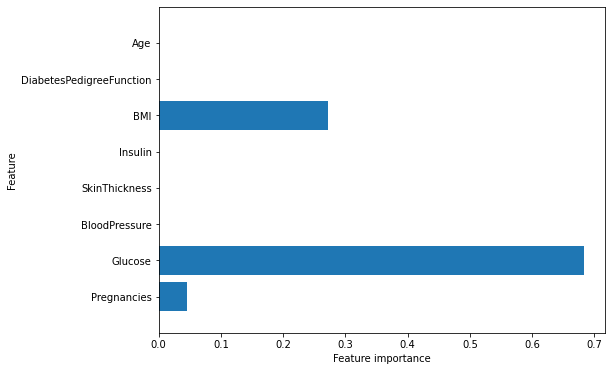

In [44]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))

    n_features = 8

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

    plt.yticks(np.arange(n_features), diabetes_features)
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree2)

# Deep Learning to Predict Diabetes
## ( Multi-layer Perceptron classifier )


In [45]:
# max_iter=200 
# alpha=0.0001
# activation='relu'
# solver='adam'
# hidden_layer_sizes=100
# Multi-layer Perceptron classifier.

# This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

# activation='logistic'
# activation='tanh'

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
mlp = MLPClassifier(random_state=42,hidden_layer_sizes=18,activation='logistic',alpha=0.1)
mlp.fit(x_train, y_train)

print(f"Accuracy on training set: {mlp.score(x_train, y_train):.2f}")
print(f"Accuracy on test set: {mlp.score(x_test, y_test):.2f}")

Accuracy on training set: 0.74
Accuracy on test set: 0.76


In [48]:
# Predicting the Test set results
y_pred_m4 = mlp.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred_m4)
print(cm4)

[[109  16]
 [ 30  37]]


<AxesSubplot:>

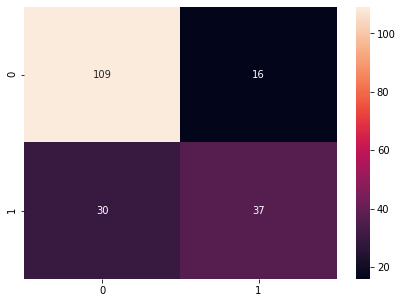

In [49]:
plt.figure(figsize = (7,5))
sns.heatmap(cm4, annot=True, fmt="d")

In [50]:
com_m4 = np.concatenate((y_pred_m4.reshape(len(y_pred_m4),1), y_test.reshape(len(y_test),1)),1)

In [51]:
com_m4[:5]

array([[0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [52]:
print(f"Number of layers: {mlp.n_layers_}")
print(f"Number of outputs: {mlp.n_outputs_}")
print(f"Class labels for each output: {mlp.classes_}")
print(f"The number of iterations the solver has ran: {mlp.n_iter_}")
print(f"Name of the output activation function: {mlp.out_activation_}")
print(f"The number of training samples seen by the solver during fitting.: {mlp.t_}")

Number of layers: 3
Number of outputs: 1
Class labels for each output: [0 1]
The number of iterations the solver has ran: 200
Name of the output activation function: logistic
The number of training samples seen by the solver during fitting.: 115200


The current loss computed with the loss function: 0.538
The minimum loss reached by the solver throughout fitting: 0.537


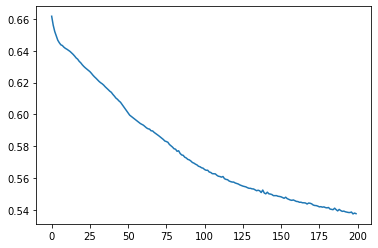

In [53]:
print(f"The current loss computed with the loss function: {mlp.loss_:0.3f}")
print(f"The minimum loss reached by the solver throughout fitting: {mlp.best_loss_:0.3f}")
plt.plot(mlp.loss_curve_)
plt.show()

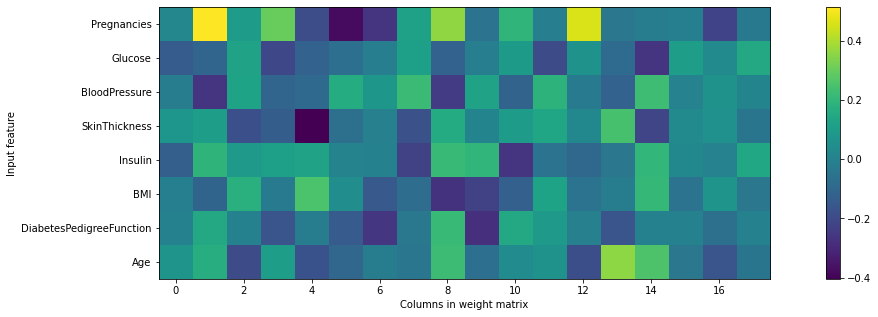

In [54]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none')
plt.xlabel("Columns in weight matrix")
plt.yticks(range(8), diabetes_features)
plt.ylabel("Input feature")
plt.colorbar()

Text(114.0, 0.5, 'Input feature')

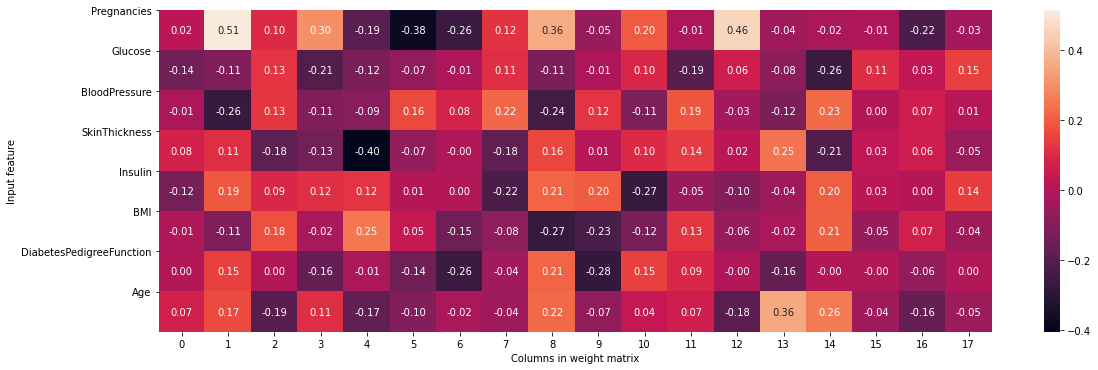

In [55]:
plt.figure(figsize=(15, 5))
sns.heatmap(mlp.coefs_[0], annot=True,fmt=".2f")

plt.tight_layout()
plt.yticks(range(8), diabetes_features,rotation=0)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

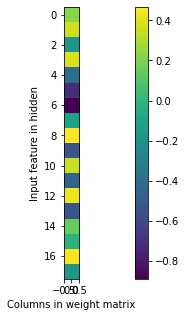

In [56]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[1], interpolation='none')
plt.ylabel("Input feature in hidden")
plt.xlabel("Columns in weight matrix")
plt.colorbar()

Text(24.0, 0.5, 'Input feature in hidden')

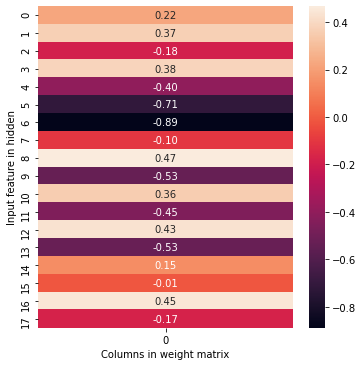

In [57]:
plt.figure(figsize=(5, 5))
sns.heatmap(mlp.coefs_[1], annot=True,fmt=".2f")

plt.tight_layout()
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature in hidden")

In [58]:
print("The ith element in the list represents the bias vector corresponding to layer i + 1 ")
print(mlp.intercepts_[0])
print(mlp.intercepts_[1])

The ith element in the list represents the bias vector corresponding to layer i + 1 
[-0.19608616 -0.56651584  0.12697049 -0.06545256 -0.04700475  0.3867396
  0.93611498  0.01339063 -0.41405587  0.27072678 -0.0343905   0.23753577
 -0.34732692  0.55274551 -0.35435097  0.09005282 -0.51683268  0.27355424]
[-0.02777025]


## ( Multi-layer Perceptron classifier ) with max iteration


In [59]:
mlp2 = MLPClassifier(random_state=42,hidden_layer_sizes=18,activation='logistic',alpha=0.1,max_iter=1000)

mlp2.fit(x_train, y_train)

print(f"Accuracy on training set: {mlp2.score(x_train, y_train):.3f}")
print(f"Accuracy on test set: {mlp2.score(x_test, y_test):.3f}")

Accuracy on training set: 0.785
Accuracy on test set: 0.755


In [60]:
# Predicting the Test set results
y_pred_m5 = mlp2.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred_m5)
print(cm5)

[[110  15]
 [ 32  35]]


<AxesSubplot:>

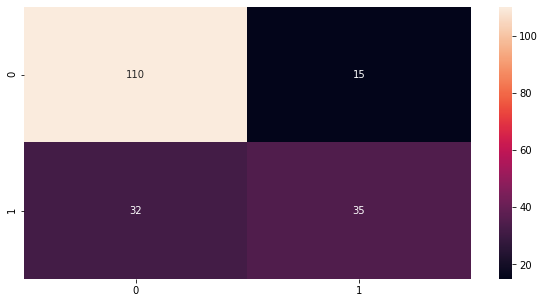

In [61]:
plt.figure(figsize = (10,5))
sns.heatmap(cm5, annot=True,fmt='d')

In [62]:
com_m5 = np.concatenate((y_pred_m5.reshape(len(y_pred_m5),1), y_test.reshape(len(y_test),1)),1)

In [63]:
com_m5[:5]

array([[0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [64]:
print(f"Number of layers: {mlp2.n_layers_}")
print(f"Number of outputs: {mlp2.n_outputs_}")
print(f"Class labels for each output: {mlp2.classes_}")
print(f"The number of iterations the solver has ran: {mlp2.n_iter_}")
print(f"Name of the output activation function: {mlp2.out_activation_}")
print(f"The number of training samples seen by the solver during fitting.: {mlp2.t_}")

Number of layers: 3
Number of outputs: 1
Class labels for each output: [0 1]
The number of iterations the solver has ran: 758
Name of the output activation function: logistic
The number of training samples seen by the solver during fitting.: 436608


The current loss computed with the loss function: 0.473
The minimum loss reached by the solver throughout fitting: 0.471


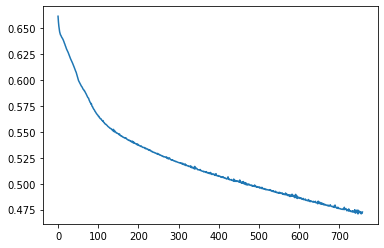

In [65]:
print(f"The current loss computed with the loss function: {mlp2.loss_:0.3f}")
print(f"The minimum loss reached by the solver throughout fitting: {mlp2.best_loss_:0.3f}")
plt.plot(mlp2.loss_curve_)
plt.show()

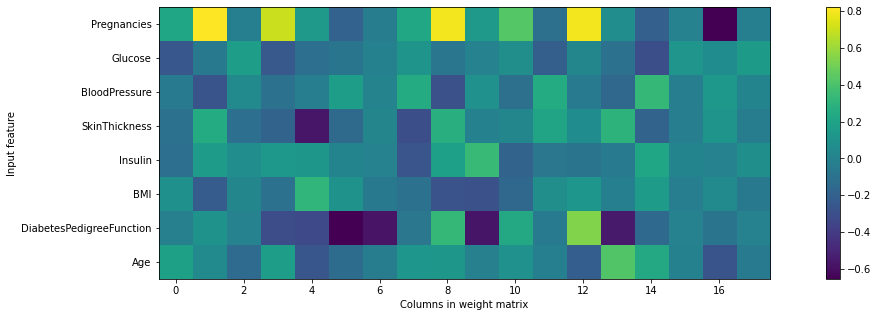

In [66]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp2.coefs_[0], interpolation='none')
plt.xlabel("Columns in weight matrix")
plt.yticks(range(8), diabetes_features)
plt.ylabel("Input feature")
plt.colorbar()

Text(114.0, 0.5, 'Input feature')

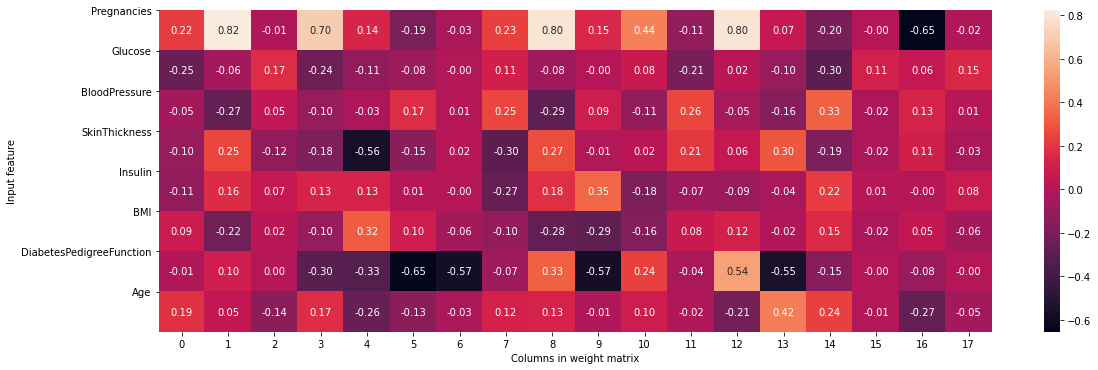

In [67]:
plt.figure(figsize=(15, 5))
sns.heatmap(mlp2.coefs_[0], annot=True, fmt=".2f")

plt.tight_layout()
plt.yticks(range(8), diabetes_features, rotation=0)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

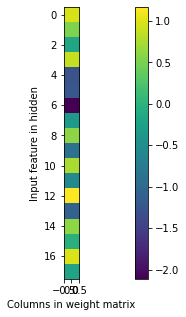

In [68]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp2.coefs_[1], interpolation='none')
plt.ylabel("Input feature in hidden")
plt.xlabel("Columns in weight matrix")
plt.colorbar()

Text(24.0, 0.5, 'Input feature')

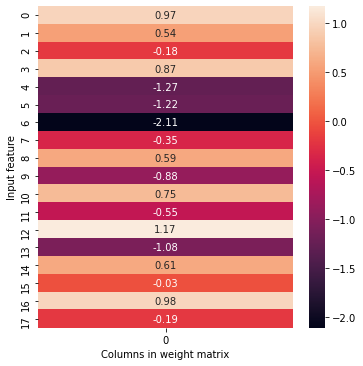

In [69]:
plt.figure(figsize=(5, 5))
sns.heatmap(mlp2.coefs_[1], annot=True, fmt=".2f")

plt.tight_layout()
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

In [70]:
print("The ith element in the list represents the bias vector corresponding to layer i + 1 ")
print(mlp2.intercepts_[0])
print(mlp2.intercepts_[1])

The ith element in the list represents the bias vector corresponding to layer i + 1 
[-0.43608346 -1.02027418  0.12590081 -0.21803218  0.40779907  1.34810869
  2.26504948  0.53293681 -0.70883321  1.04852338 -0.84904955  0.7262882
 -1.36925708  1.25060264 -0.94417766  0.10965464 -0.99687527  0.3727658 ]
[0.01775044]


## ( Multi-layer Perceptron classifier ) with Scaler

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [72]:
mlp3 = MLPClassifier(random_state=42,hidden_layer_sizes=18,activation='relu',alpha=0.1)

mlp3.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {mlp3.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy on test set: {mlp3.score(X_test_scaled, y_test):.3f}")

Accuracy on training set: 0.795
Accuracy on test set: 0.807


In [73]:
# Predicting the Test set results
y_pred_m6 = mlp3.predict(X_test_scaled)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred_m6)
print(cm6)

[[109  16]
 [ 21  46]]


<AxesSubplot:>

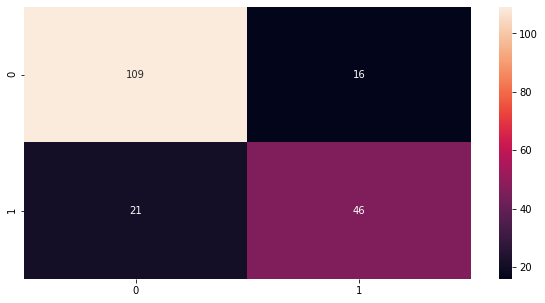

In [74]:
plt.figure(figsize = (10,5))
sns.heatmap(cm6, annot=True,fmt='d')

In [75]:
com_m6 = np.concatenate((y_pred_m5.reshape(len(y_pred_m6),1), y_test.reshape(len(y_test),1)),1)

In [76]:
com_m6[:5]

array([[0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [77]:
print(f"Number of layers: {mlp3.n_layers_}")
print(f"Number of outputs: {mlp3.n_outputs_}")
print(f"The number of iterations the solver has ran: {mlp3.n_iter_}")
print(f"Name of the output activation function: {mlp3.out_activation_}")
print(f"Class labels for each output: {mlp3.classes_}")
print(f"The number of training samples seen by the solver during fitting.: {mlp3.t_}")

Number of layers: 3
Number of outputs: 1
The number of iterations the solver has ran: 200
Name of the output activation function: logistic
Class labels for each output: [0 1]
The number of training samples seen by the solver during fitting.: 115200


The current loss computed with the loss function: 0.438
The minimum loss reached by the solver throughout fitting: 0.438


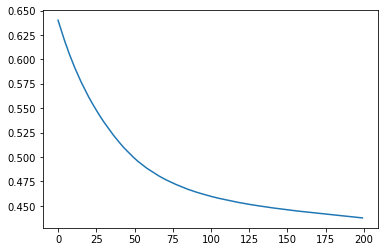

In [78]:
print(f"The current loss computed with the loss function: {mlp3.loss_:0.3f}")
print(f"The minimum loss reached by the solver throughout fitting: {mlp3.best_loss_:0.3f}")
plt.plot(mlp3.loss_curve_)
plt.show()

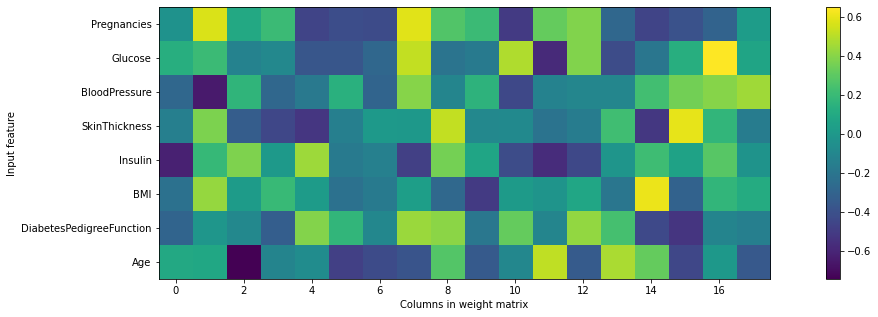

In [79]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp3.coefs_[0], interpolation='none')
plt.xlabel("Columns in weight matrix")
plt.yticks(range(8), diabetes_features)
plt.ylabel("Input feature")
plt.colorbar()

Text(114.0, 0.5, 'Input feature')

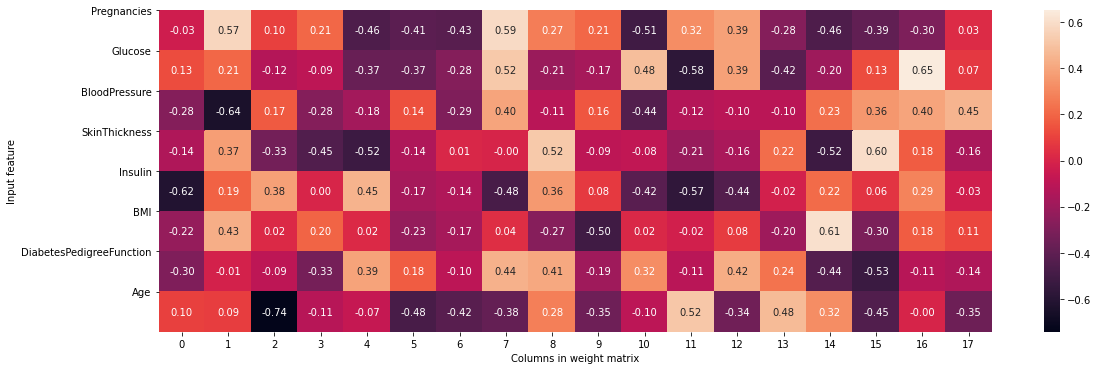

In [80]:
plt.figure(figsize=(15, 5))
sns.heatmap(mlp3.coefs_[0], annot=True,fmt=".2f")

plt.tight_layout()
plt.yticks(range(8), diabetes_features,rotation=0)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

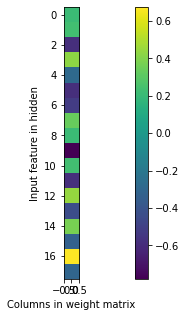

In [81]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp3.coefs_[1], interpolation='none')
plt.ylabel("Input feature in hidden")
plt.xlabel("Columns in weight matrix")
plt.colorbar()

Text(24.0, 0.5, 'Input feature')

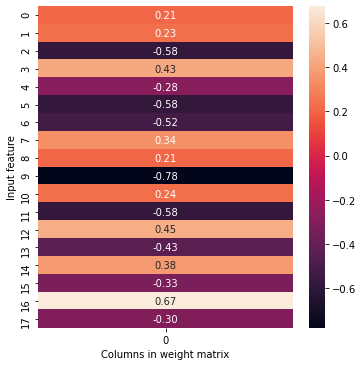

In [82]:
plt.figure(figsize=(5, 5))
sns.heatmap(mlp3.coefs_[1], annot=True,fmt=".2f")

plt.tight_layout()
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

In [83]:
print("The ith element in the list represents the bias vector corresponding to layer i + 1 ")
print(mlp3.intercepts_[0])
print(mlp3.intercepts_[1])

The ith element in the list represents the bias vector corresponding to layer i + 1 
[-0.24877506 -0.19444628  0.07630157 -0.13085361 -0.29459187  0.0155135
  0.23978217 -0.00277878 -0.14999315  0.29264453  0.65681119  0.00863067
  0.45810333  0.49294816 -0.30496778  0.51304065 -0.0775094   0.06353821]
[-0.11304951]


## ( Multi-layer Perceptron classifier ) with Scaler and max iteration

In [84]:
mlp4 = MLPClassifier(random_state=42,hidden_layer_sizes=18,activation='relu',alpha=0.1,max_iter=1000)

mlp4.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {mlp4.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy on test set: {mlp4.score(X_test_scaled, y_test):.3f}")

Accuracy on training set: 0.821
Accuracy on test set: 0.812


In [85]:
# Predicting the Test set results
y_pred_m7 = mlp4.predict(X_test_scaled)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_test, y_pred_m7)
print(cm7)

[[109  16]
 [ 20  47]]


<AxesSubplot:>

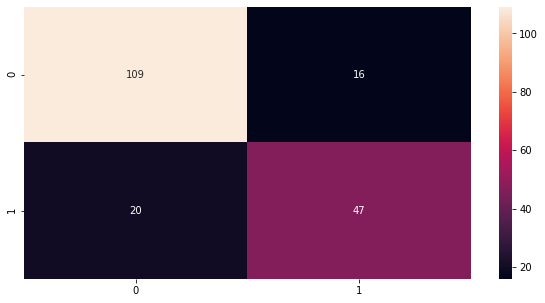

In [86]:
plt.figure(figsize = (10,5))
sns.heatmap(cm7, annot=True, fmt='d')

In [87]:
com_m7 = np.concatenate((y_pred_m5.reshape(len(y_pred_m7),1), y_test.reshape(len(y_test),1)),1)

In [88]:
com_m7[:5]

array([[0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [89]:
print(f"Number of layers: {mlp4.n_layers_}")
print(f"Number of outputs: {mlp4.n_outputs_}")
print(f"The number of iterations the solver has ran: {mlp4.n_iter_}")
print(f"Name of the output activation function: {mlp4.out_activation_}")
print(f"Class labels for each output: {mlp4.classes_}")
print(f"The number of training samples seen by the solver during fitting.: {mlp4.t_}")

Number of layers: 3
Number of outputs: 1
The number of iterations the solver has ran: 555
Name of the output activation function: logistic
Class labels for each output: [0 1]
The number of training samples seen by the solver during fitting.: 319680


The current loss computed with the loss function: 0.404
The minimum loss reached by the solver throughout fitting: 0.404


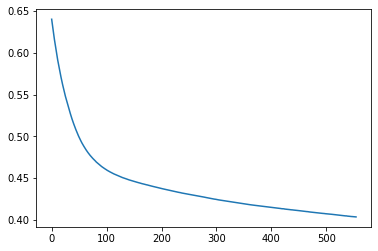

In [90]:
print(f"The current loss computed with the loss function: {mlp4.loss_:0.3f}")
print(f"The minimum loss reached by the solver throughout fitting: {mlp4.best_loss_:0.3f}")
plt.plot(mlp4.loss_curve_)
plt.show()

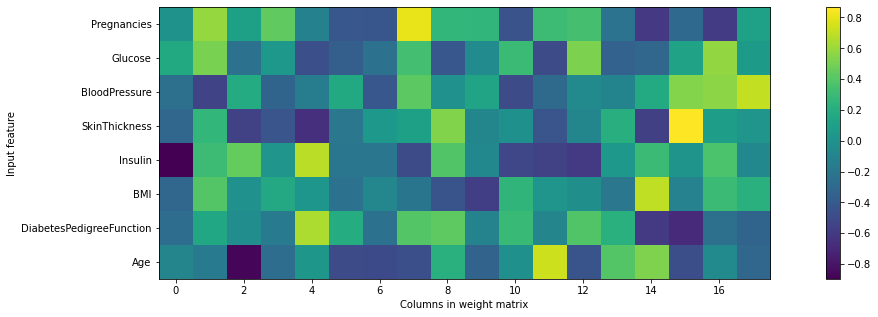

In [91]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp4.coefs_[0], interpolation='none')
plt.xlabel("Columns in weight matrix")
plt.yticks(range(8), diabetes_features)
plt.ylabel("Input feature")
plt.colorbar()

Text(114.0, 0.5, 'Input feature')

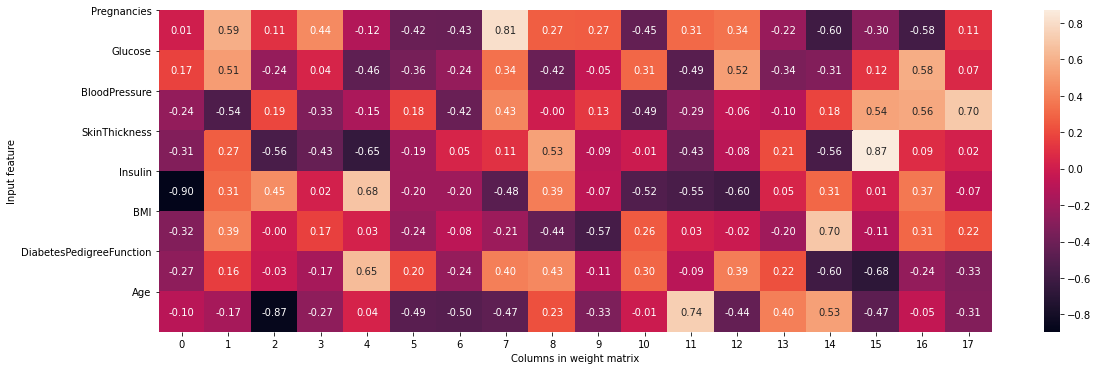

In [92]:
plt.figure(figsize=(15, 5))
sns.heatmap(mlp4.coefs_[0], annot=True,fmt=".2f")

plt.tight_layout()
plt.yticks(range(8), diabetes_features, rotation=0)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

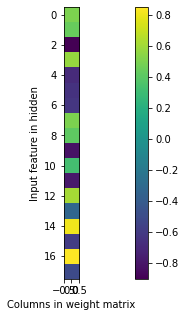

In [93]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp4.coefs_[1], interpolation='none')
plt.ylabel("Input feature in hidden")
plt.xlabel("Columns in weight matrix")
plt.colorbar()

Text(24.0, 0.5, 'Input feature')

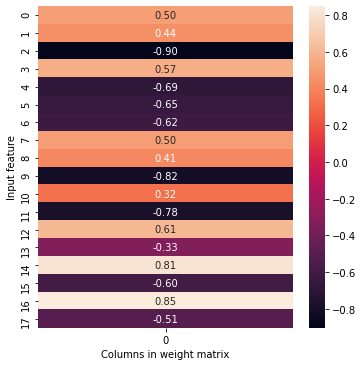

In [94]:
plt.figure(figsize=(5, 5))
sns.heatmap(mlp4.coefs_[1], annot=True,fmt=".2f")

plt.tight_layout()
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

In [95]:
print("The ith element in the list represents the bias vector corresponding to layer i + 1 ")
print(mlp4.intercepts_[0])
print(mlp4.intercepts_[1])

The ith element in the list represents the bias vector corresponding to layer i + 1 
[-0.23601528 -0.30998156 -0.04296635 -0.21621758 -0.1305802   0.01161429
  0.16243871  0.12442755  0.11265624  0.36023563  0.68325719  0.11994553
  0.55464472  0.45074252 -0.44386004  0.63388968 -0.16685081 -0.00783808]
[-0.04672948]


# compare

In [96]:
m1 = com_m1[:,0]
m2 = com_m2[:,0] 
m3 = com_m3[:,0]
m4 = com_m4[:,0]
m5 = com_m5[:,0]
m6 = com_m6[:,0]
m7 = com_m7[:,0]
outcome = y_test

In [97]:
m1_2d = m1.reshape((len(m1),1))
m2_2d = m2.reshape((len(m2),1))
m3_2d = m3.reshape((len(m3),1))
m4_2d = m4.reshape((len(m4),1))
m5_2d = m5.reshape((len(m5),1))
m6_2d = m6.reshape((len(m6),1))
m7_2d = m7.reshape((len(m7),1))
outcome_2d = outcome.reshape((len(outcome),1))

In [98]:
predictions = np.concatenate((m1_2d,m2_2d,m3_2d,m4_2d,m5_2d,m6_2d,m7_2d,outcome_2d), axis=1)

In [99]:
predictions

array([[1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
data = {
    'knn': m1,
    'tree': m2,
    'tree_max_depth':m3,
    'mlp':m4,
    'mlp_max_iter':m5,
    'mlp_scale':m6,
    'mlp_scale_max_itrs':m7,
    'outcome':outcome
}

In [101]:
predictions_df = pd.DataFrame(data)

In [102]:
predictions_df

,knn,tree,tree_max_depth,mlp,mlp_max_iter,mlp_scale,mlp_scale_max_itrs,outcome
0,1,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
187,1,1,0,1,1,1,1,1
188,0,1,0,0,0,0,0,0
189,1,1,1,1,1,1,1,1
190,0,0,0,0,0,0,0,1


In [103]:
predictions_df.to_csv('predictions_df.csv')

In [104]:
[knn_train, knn_test] = knn.score(x_train, y_train), knn.score(x_test, y_test)
[tree_train, tree_test] = tree.score(x_train, y_train), tree.score(x_test, y_test)
[tree2_train, tree2_test] = tree2.score(x_train, y_train), tree2.score(x_test, y_test)
[mlp_train, mlp_test] = mlp.score(x_train, y_train), mlp.score(x_test, y_test)
[mlp_max_iter_train, mlp_max_iter_test] = mlp2.score(x_train, y_train), mlp2.score(x_test, y_test)
[mlp_scale_train, mlp_scale_test] = mlp3.score(X_train_scaled, y_train), mlp3.score(X_test_scaled, y_test)
[mlp_scale_max_itrs_train, mlp_scale_max_itrs_test] = mlp4.score(X_train_scaled, y_train), mlp4.score(X_test_scaled, y_test)

In [105]:
data_accuracy = {
    'knn': [knn_train,knn_test],
    'tree': [tree_train,tree_test],
    'tree_max_depth':[tree2_train, tree2_test],
    'mlp':[mlp_train, mlp_test],
    'mlp_max_iter':[mlp_max_iter_train, mlp_max_iter_test],
    'mlp_scale':[mlp_scale_train, mlp_scale_test],
    'mlp_scale_max_itrs':[mlp_scale_max_itrs_train, mlp_scale_max_itrs_test],
}

In [106]:
accuracy_df = pd.DataFrame(data_accuracy,index=['TRAIN', 'TEST'])

In [107]:
accuracy_df

,knn,tree,tree_max_depth,mlp,mlp_max_iter,mlp_scale,mlp_scale_max_itrs
TRAIN,0.791667,1.000000,0.772569,0.744792,0.784722,0.795139,0.821181
TEST,0.776042,0.713542,0.739583,0.760417,0.755208,0.807292,0.812500


In [108]:
accuracy_df.to_csv('accuracy_df.csv')

In [110]:
accuracy_df = pd.DataFrame(data_accuracy,index=['TRAIN', 'TEST'])

In [113]:
accuracy_df.iloc[:]*100

,knn,tree,tree_max_depth,mlp,mlp_max_iter,mlp_scale,mlp_scale_max_itrs
TRAIN,79.166667,100.000000,77.256944,74.479167,78.472222,79.513889,82.118056
TEST,77.604167,71.354167,73.958333,76.041667,75.520833,80.729167,81.250000
